In [25]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None, 
               countlabel=False):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')

    format_spines(ax, right_border=False)
        
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        if countlabel == True:
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text

    plt.show()

def bar_plot(x, y, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None,
            countlabel=False):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.barplot(x = x, y=y, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    
    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        if countlabel:            
            ax.annotate('{}\n{:.1f}%'.format(int(y),100.*y/ncount),(x.mean(), y), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),
                       ha='center',va='bottom')
    plt.show()

def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors

    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):

    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    format_spines(ax, right_border=False)

    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')


<font color="darkslateblue" size=+2.5><b>Introduction</b></font>

In this article, we embark on an exciting journey through the OList-Ecommerce dataset, using Exploratory Data Analysis (EDA) to uncover valuable insights and address key business questions. By exploring this dataset, we aim to reveal hidden patterns that can enhance operations, refine marketing strategies, and optimize overall performance. So, let's dive in and discover the untapped potential within the OList-Ecommerce dataset!

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>About Dataset</b></font>

The OList-Ecommerce dataset is a collection of real Brazilian ecommerce data from Olist Store. It includes information about 100,000 orders made between 2016 and 2018 across multiple marketplaces in Brazil. The dataset covers various aspects of each order, such as order status, price, payment, delivery performance, customer location, product details, and customer reviews.
By exploring this dataset, we can gain a deeper understanding of Olist's ecommerce platform, uncover meaningful patterns, and make informed decisions to improve business strategies.

To perform an analysis of e-commerce sales, we need to read the data from the `olist.db` database.  
The following datasets will be included in the analysis:  

- `olist_customers_dataset`
- `olist_geolocation_dataset`
- `olist_orders_dataset`
- `olist_order_items_dataset`
- `olist_order_payments_dataset`
- `olist_order_reviews_dataset`
- `olist_products_dataset`
- `olist_sellers_dataset`
- `product_category_name_translation`

The OList Ecommerce dataset consists of several interconnected tables, representing different aspects of e-commerce sales.
The following image illustrates the relationships between the tables:

<img src="Data_Relation_Olist.png" alt="Database Relation" width="500">

These datasets provide valuable information on different aspects of e-commerce sales. By analyzing these datasets, we can gain insights and make informed decisions for future exploratory data analysis.

Before we dive into the exciting world of data analysis, let's ensure we have the necessary tools by importing essential libraries.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

The next step is to read the dataset by establishing a connection to a SQLite database (`olist.db`) and retrieving the table names from the database.  
Each table is then converted into a DataFrame using `pd.read_sql()` and assigned to a dynamically named variable.

In [3]:
# Connect to the database
db_path = 'olist.db'
connection = sqlite3.connect(db_path)

# Create a cursor object
cursor = connection.cursor()

# Get the table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = cursor.fetchall()

# Create a DataFrame to store the table names
list_table_name = pd.DataFrame(table_names, columns=['Table List'])

# Convert each table to a DataFrame
for table_name in table_names:
    # Extract the table name from the result tuple
    table_name = table_name[0]

    # Fetch all rows from the table
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, connection)

    # Assign the DataFrame to the table name variable dynamically
    globals()[table_name] = df
    
    # Print the table name
    print(f"Table: {table_name}")

# Close the cursor and the connection
cursor.close()
connection.close()

Table: olist_order_customer_dataset
Table: olist_order_dataset
Table: olist_order_reviews_dataset
Table: olist_order_payments_dataset
Table: olist_order_items_dataset
Table: olist_products_dataset
Table: olist_sellers_dataset
Table: olist_geolocation_dataset
Table: product_category_name_translation


With the database connection established and the tables converted into DataFrames, we are now ready to explore and analyze the dataset further.

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Overview Data</b></font>

In this code snippet, we create a DataFrame that provides useful information about all the datasets, including the number of rows, number of columns, amount of null values, number of columns with null values, and the names of columns with null values.

In [4]:
# Generating a DataFrame with insightful information about the datasets
data_info = list_table_name.copy()
data_info['Number of Rows'] = [globals()[df].shape[0] for df in data_info['Table List'].tolist()]
data_info['Number of Columns'] = [globals()[df].shape[1] for df in data_info['Table List'].tolist()]
data_info['Total Null Values'] = [globals()[df].isnull().sum().sum() for df in data_info['Table List'].tolist()]
data_info['Columns with Null Values'] = [len([col for col, null in globals()[df].isnull().sum().items() if null > 0]) for df in data_info['Table List'].tolist()]
data_info['Null Columns'] = [', '.join([col for col, null in globals()[df].isnull().sum().items() if null > 0]) for df in data_info['Table List'].tolist()]

# Apply a background gradient to enhance readability
data_info.style.background_gradient()


,Table List,Number of Rows,Number of Columns,Total Null Values,Columns with Null Values,Null Columns
0,olist_order_customer_dataset,99441,6,0,0,
1,olist_order_dataset,99441,9,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
2,olist_order_reviews_dataset,99224,8,145903,2,"review_comment_title, review_comment_message"
3,olist_order_payments_dataset,103886,6,0,0,
4,olist_order_items_dataset,112650,8,0,0,
5,olist_products_dataset,32951,10,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,olist_sellers_dataset,3095,5,0,0,
7,olist_geolocation_dataset,1000163,6,0,0,
8,product_category_name_translation,71,3,0,0,


<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Exploratory Data</b></font>

Now, let's delve into an exploratory data analysis aimed at extracting insights from O-List E-Commerce dataset. Our objective is to categorize this session into various topics, enabling us to examine graphical representations for each area, such as orders, customers, products, items, and more.

<a id="4.1"></a>
<font color="dimgrey" size=+2.0><b>4.1 Total Orders on E-Commerce</b></font>

Objective: Analyze Order Status Distribution

Description: This visualization examines how orders are distributed across different status categories in the olist_order_dataset table. It provides a clear overview of the order statuses and their corresponding percentages.

By analyzing the order status distribution, businesses can identify areas for improvement in their order processing and fulfillment operations. This can result in improved efficiency, fewer cancellations, faster processing times, and enhanced customer satisfaction.

This visualization simplifies understanding of the order status distribution, enabling data-driven decision-making and operational enhancements for businesses.

In [5]:
df_orders = olist_order_dataset.merge(olist_order_customer_dataset, how='left', on='customer_id')
timestamp_cols = ['order_purchase_timestamp','order_approved_at',
                  'order_delivered_carrier_date','order_delivered_customer_date',
                  'order_estimated_delivery_date']

for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y')
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].dt.strftime('%m')
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].dt.strftime('%d')
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].dt.strftime('%h')
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].dt.strftime('%a')
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].dt.strftime('%H')
df_orders['order_purchase_time_day'] = df_orders['order_purchase_timestamp'].dt.strftime('%p')
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m')
df_orders['classification_time_purchase'] = df_orders['order_purchase_hour'].apply(lambda time: "Morning" if 6 <= int(time) < 12 else "Afternoon" if 12 <= int(time) < 17 else "Evening" if 17 <= int(time) <= 20 else "Night")


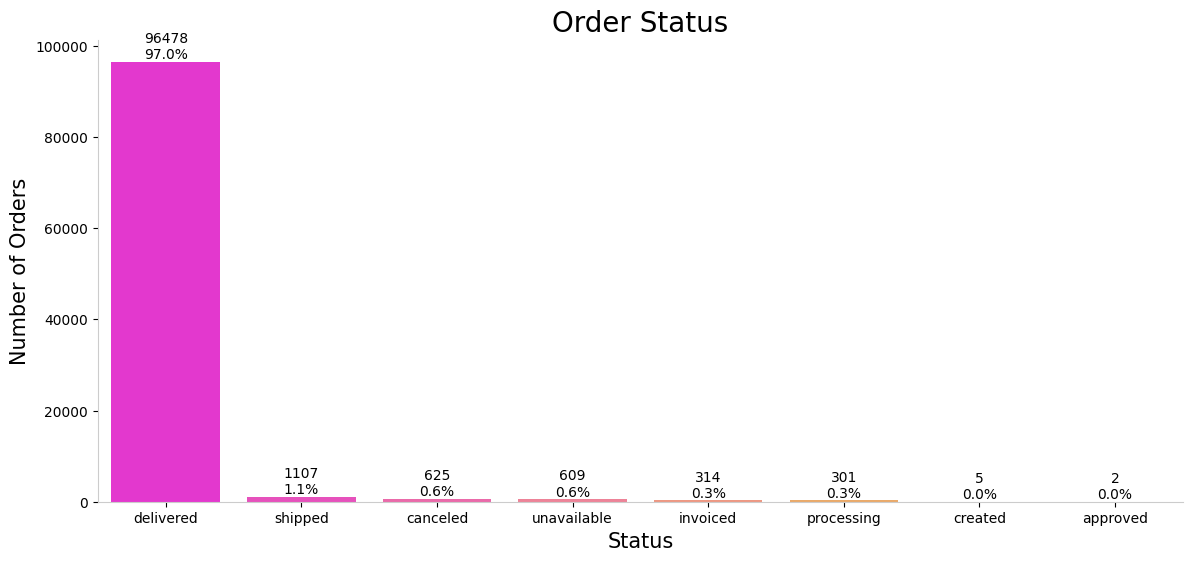

In [8]:
x = df_orders['order_status']
order = df_orders['order_status'].value_counts().index
count_plot(x, df_orders, 'Order Status', 'Status', 'Number of Orders', 14, 6, order=order, palette='spring', countlabel=True)

Key observations:
* `Delivered` status accounts for the majority of orders, approximately 97.0%.
* `Shipped` status represents around 1.1% of orders.
* `Other` statuses like `Canceled`,`Unavailable`,`Invoiced`,`Processing`,`Created`, and `Approved` make up less than 1% each.


<a id="4.2"></a>
<font color="dimgrey" size=+2.0><b>4.2 Total Orders Timestamps</b></font>

Objective: Explore Purchase Timestamps

Description: The objective of this analysis is to gain insights into the purchase timestamps of orders in the dataset. By examining different components such as year, month, day, hour, and time of day, and comparing order counts across different time periods, we aim to understand the temporal distribution and patterns of orders.

To achieve this objective, we will conduct a comprehensive analysis of the order amount in e-commerce during the dataset period. We will create visualizations to answer the following questions:

1. How are the orders distributed across different purchase timestamps?
2. Is there a growing trend in Brazilian e-commerce?
3. On which day of the week do Brazilian customers tend to make online purchases?
4. At what time of the day do Brazilian customers tend to buy (Dawn, Morning, Afternoon, or Night)?

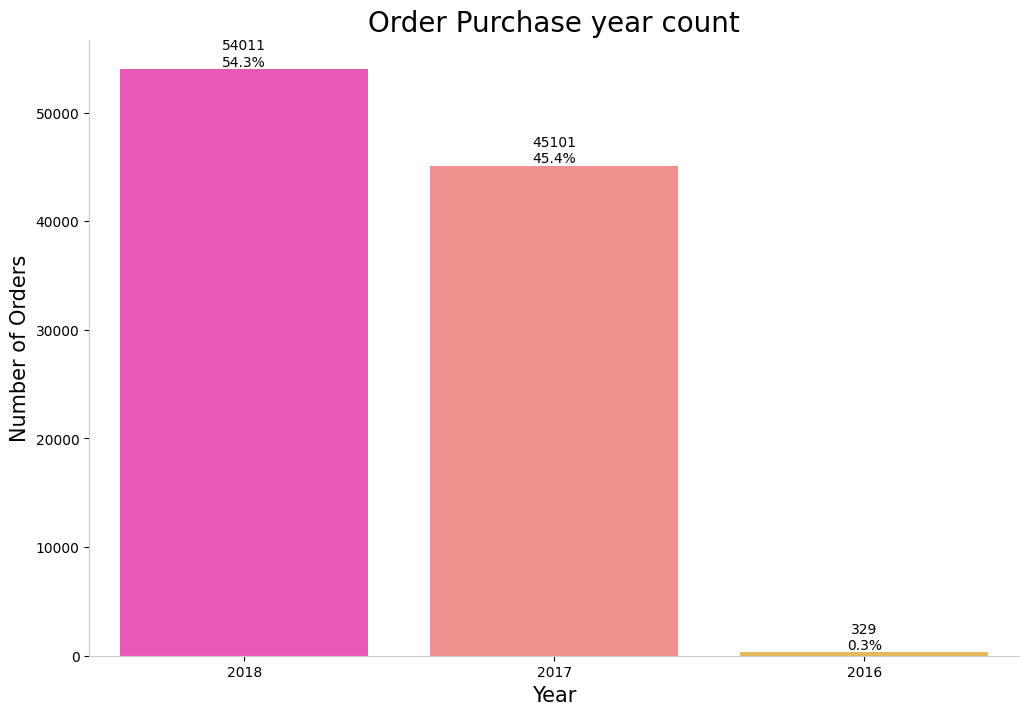

In [9]:
x = df_orders['order_purchase_year']
order = df_orders['order_purchase_year'].value_counts().index
count_plot(x, df_orders, 'Order Purchase year count', 'Year', 'Number of Orders', 12, 8, order=order, palette='spring',countlabel=True)

The analysis shows the percentage of orders each year in relation to the total number of orders from 2016 to 2018. In 2016, there was a 0.3% contribution with a total of 329 orders. In 2017, there was a significant increase, accounting for 45.4% with 45,101 orders. Continuing the upward trend, 2018 represented 54.4% of the total orders, amounting to 54,011 orders.

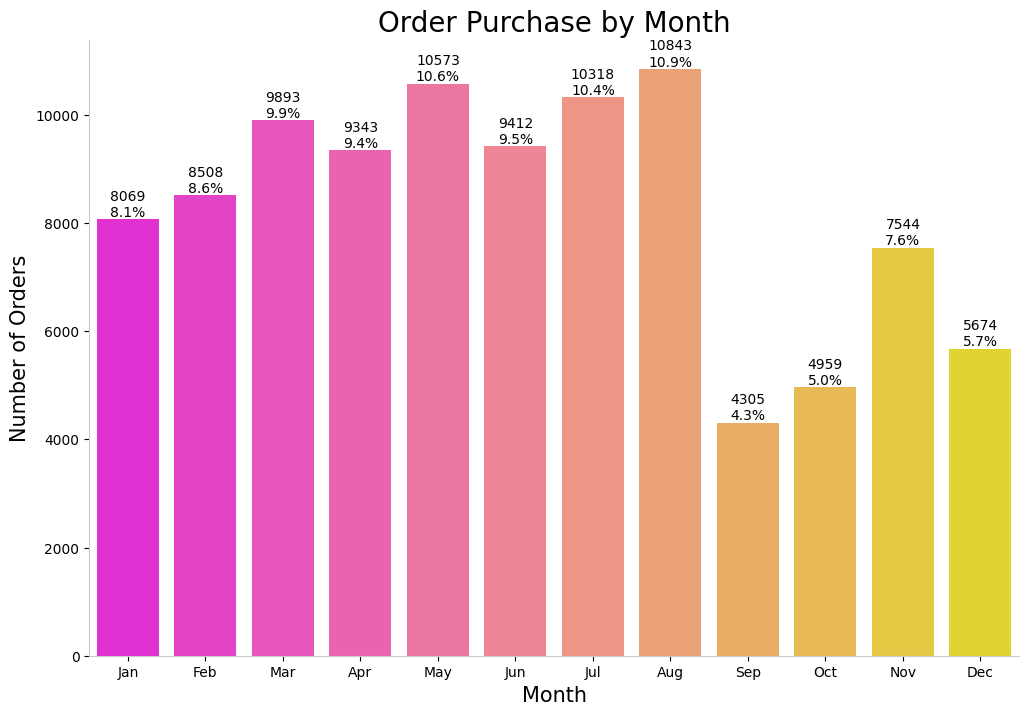

In [10]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = df_orders['order_purchase_month_name']
count_plot(x,df_orders, 'Order Purchase by Month', 'Month', 'Number of Orders', 12, 8, order=order, palette='spring',countlabel=True)

Analysis from order purchase by month:
1. The number of orders shows a general upward trend from January to August, with the highest number of orders occurring in August. This may indicate increased purchasing activity during the summer months.
2.There is a significant drop in the number of orders from September to October, suggesting a potential decrease in consumer demand during this period.
3.November shows a notable increase in the number of orders, likely due to the holiday season and events like Black Friday and Cyber Monday, which often drive higher sales.
4.December exhibits a slight decline in the number of orders compared to November, which could be attributed to the culmination of the holiday shopping period.

These insights highlight the seasonal patterns and fluctuations in order volumes throughout the year, allowing businesses to better understand customer behavior and plan their operations accordingly.

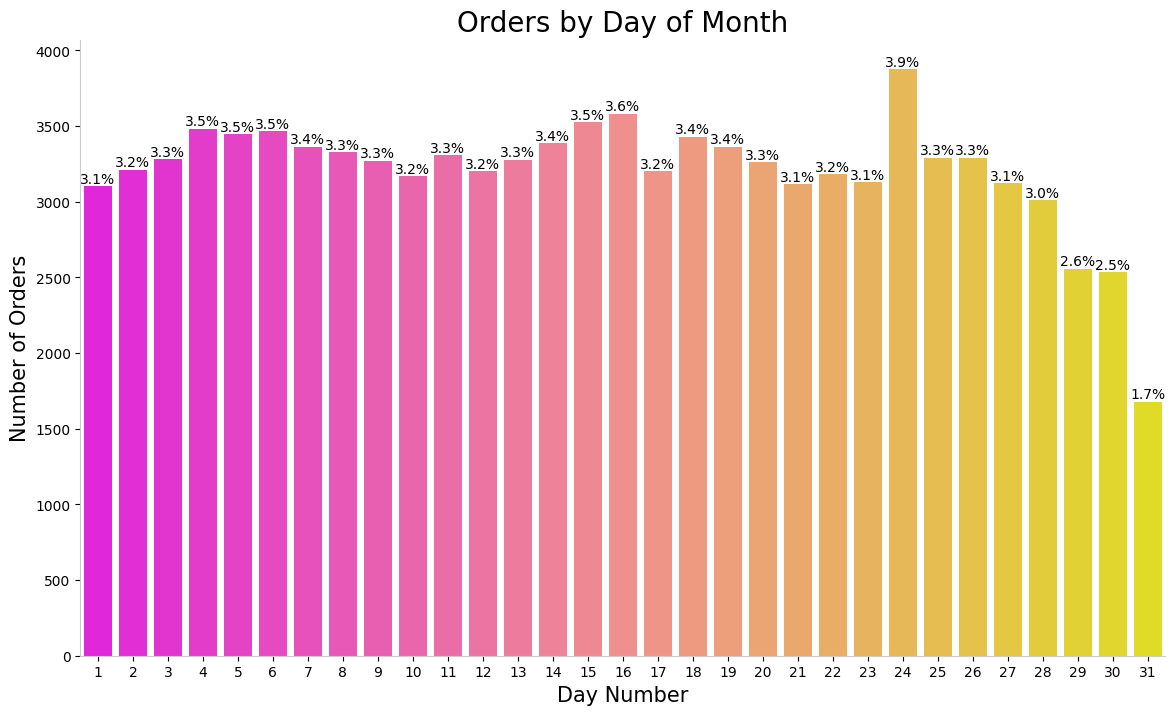

In [11]:
x = df_orders['order_purchase_day'].astype(int).astype(str)
order = [str(i) for i in range(1,32)]
count_plot(x, df_orders, 'Orders by Day of Month', 'Day Number', 'Number of Orders', 14,8, order=order,palette='spring')

Analysis from order purchase by day of month :
1. The number of orders per day follows a relatively consistent pattern throughout the month.
2. Days 24 and 15 have the highest order counts, with 3,877 and 3,524 orders respectively. These could be significant dates or occasions that drive increased purchasing activity.
3. Days 29, 30, and 31 have notably lower order counts compared to other days of the month. This could be due to the varying number of days in each month or specific factors influencing customer behavior.

Overall, the data provides a comprehensive view of order distribution across different days of the month, highlighting potential trends or patterns that businesses can leverage for decision-making and operational planning.

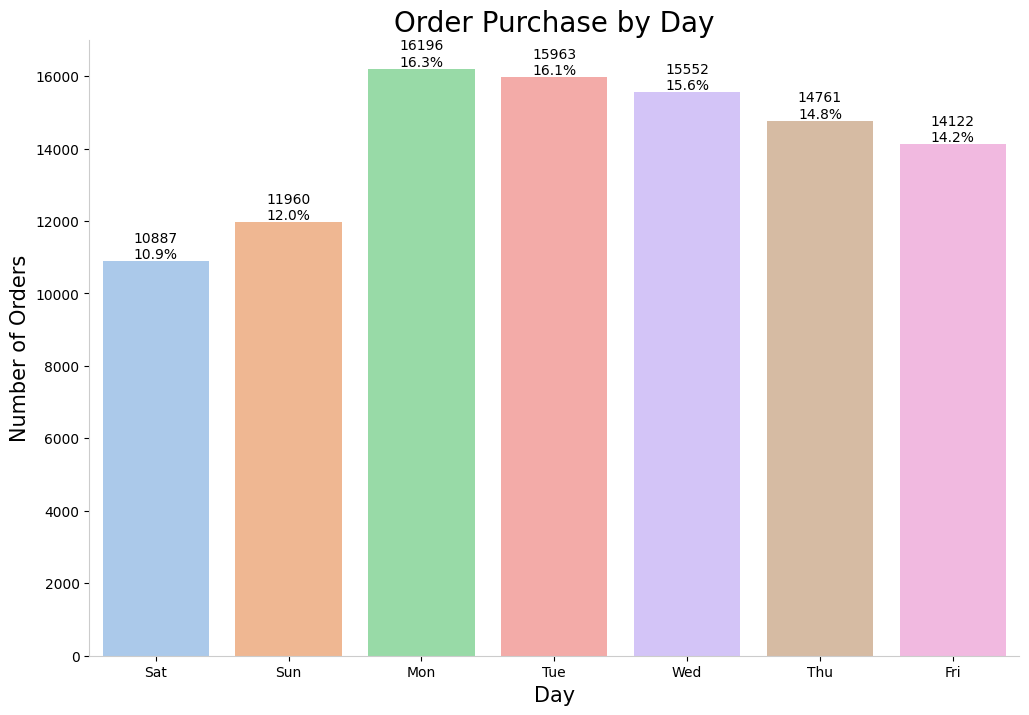

In [12]:
order = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
x = df_orders['order_purchase_dayofweek_name']
count_plot(x, df_orders, 'Order Purchase by Day', 'Day', 'Number of Orders', 12, 8, order=order, palette='pastel',countlabel=True)

Analysis from order purchase by day :
1. Mondays have the highest number of orders, with 16,196 orders, indicating a peak in purchasing activity at the beginning of the week.
2. Sundays closely follow Mondays with 11,960 orders, suggesting that weekends are also popular for online shopping.
3. Tuesdays, Wednesdays, and Thursdays show similar order counts, ranging from 15,552 to 16,963, indicating consistent purchasing activity throughout the middle of the week.
4.Fridays have the lowest number of orders among the weekdays, with 14,122 orders, potentially indicating a slight dip in purchasing activity at the end of the week.

These insights highlight the varying levels of customer engagement throughout the week, allowing businesses to plan their operations and marketing strategies accordingly to cater to the fluctuating demand.

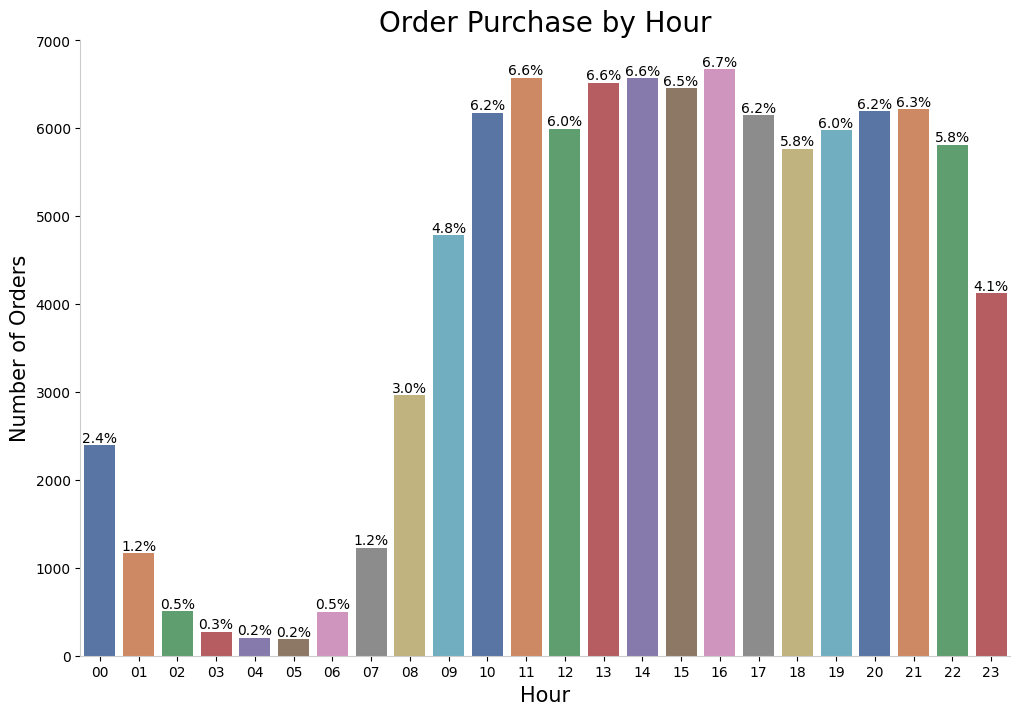

In [13]:
x = df_orders['order_purchase_hour']
order = [str(i).zfill(2) for i in range(24)]
count_plot(x, df_orders, 'Order Purchase by Hour', 'Hour', 'Number of Orders', 12, 8, order=order, palette='deep')

Analysis from Purchase Order by Hour :
1. The hours between 09:00 and 17:00 (9:00 AM to 5:00 PM) exhibit the highest order volumes, with a consistent upward trend from 9:00 AM until reaching a peak at 4:00 PM. This suggests that the majority of customers prefer to make purchases during regular business hours.
2. Early morning hours, particularly from 00:00 to 06:00 (12:00 AM to 6:00 AM), show relatively lower order counts. This is expected, as fewer customers tend to engage in online shopping during these hours, likely due to sleeping or other offline activities.
3. There is a gradual decline in order counts from 17:00 (5:00 PM) onward until midnight, with the lowest number of orders occurring at 23:00 (11:00 PM). This may indicate a decrease in purchasing activity during the evening and late-night hours.

These suggest that businesses can strategically allocate resources, such as customer support and marketing efforts, during the peak hours of 9:00 AM to 5:00 PM to accommodate the higher demand. Additionally, identifying and targeting potential customers during the non-peak hours could be an opportunity for businesses to maximize their reach and engagement.

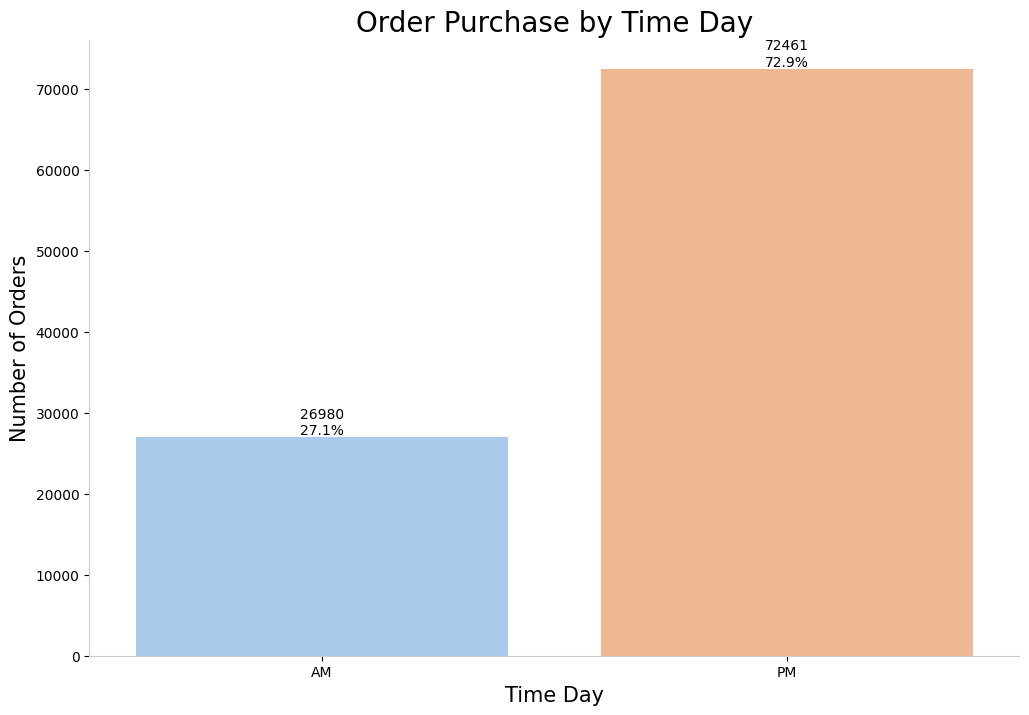

In [14]:
x = df_orders['order_purchase_time_day']
count_plot(x, df_orders,'Order Purchase by Time Day', 'Time Day', 'Number of Orders', 12, 8, order=['AM','PM'], palette='pastel',countlabel=True)

Analysis purchase order by time day :

1. The majority of orders occur during the afternoon and evening (PM), with 72,461 orders. This suggests that customers are more active in making purchases during this time period.
2. There is a relatively lower number of orders during the morning (AM), with 26,980 orders. This indicates a potential decrease in purchasing activity during these hours.

These insights highlight the time distribution of orders throughout the day, with a higher concentration in the afternoon and evening. Businesses can consider allocating resources and planning marketing strategies accordingly to cater to the higher demand during the PM time period.

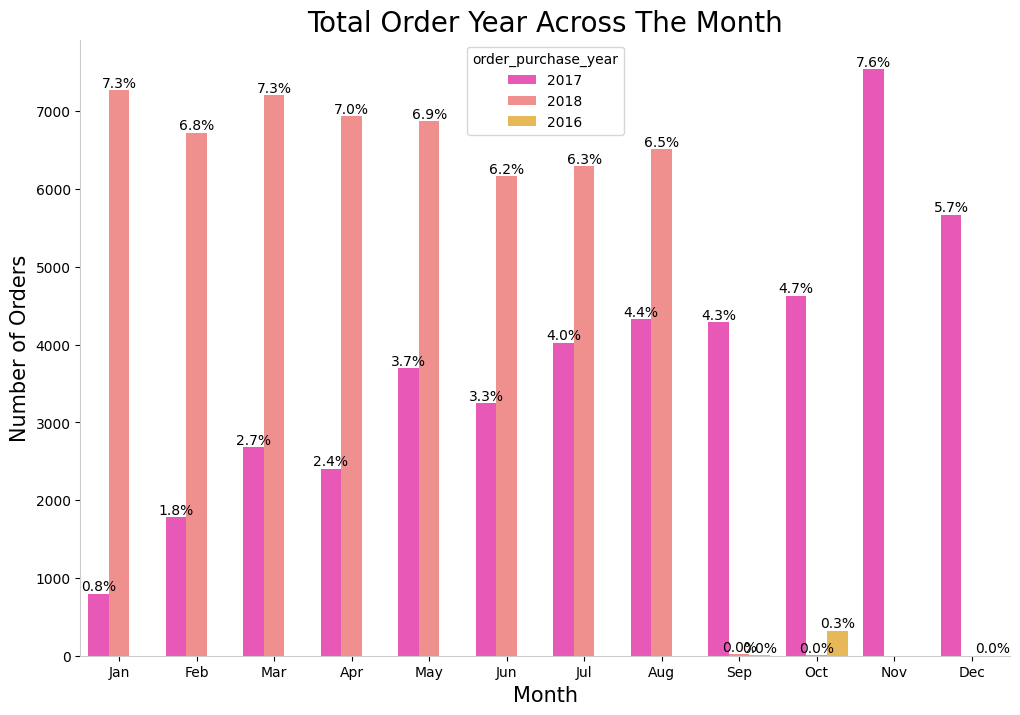

In [15]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = df_orders['order_purchase_month_name']
hue = df_orders['order_purchase_year']
count_plot(x,df_orders, 'Total Order Year Across The Month','Month','Number of Orders',12,8,order=order,hue=hue,palette='spring')

Analysis purchase order by month across year :
There is a consistent increase in the number of orders from 2016 to 2018, with the year 2017 standing out as having the highest order counts across most months, indicating a significant surge in sales. However, missing values in certain months and years, such as November and December of 2016, suggest incomplete or unavailable data. Additionally, a decline in order volumes is observed in the later months of 2018 compared to the previous year. These findings emphasize the importance of analyzing yearly trends and seasonal patterns to optimize business strategies and operations.

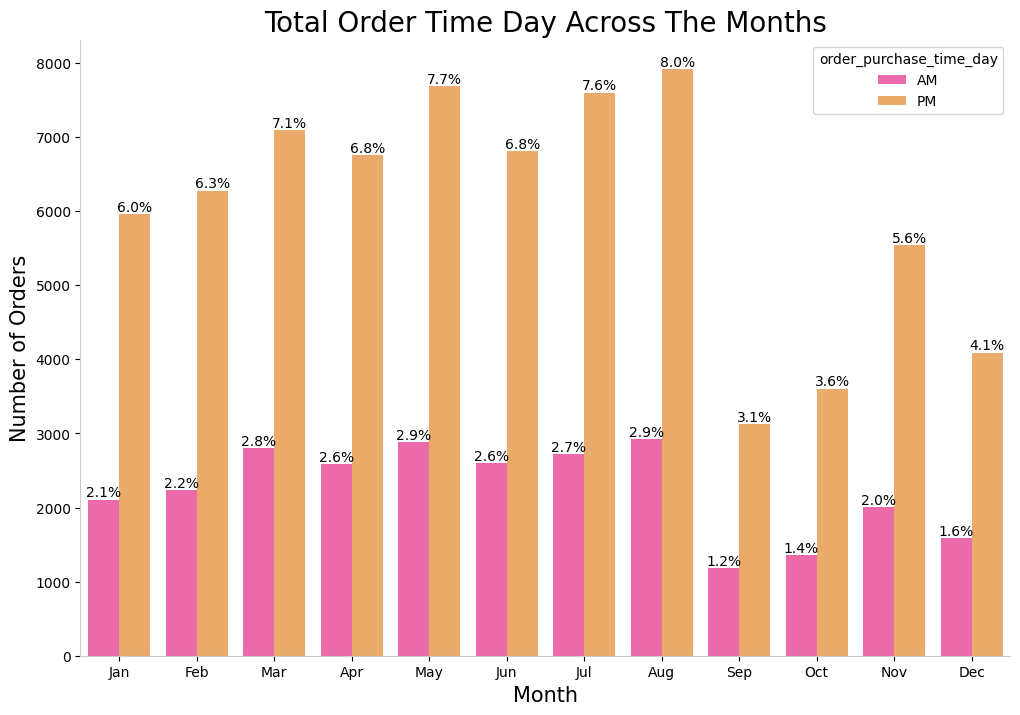

In [16]:
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = df_orders['order_purchase_month_name']
hue = df_orders['order_purchase_time_day']
count_plot(x,df_orders, 'Total Order Time Day Across The Months','Month','Number of Orders',12,8,order=order,hue=hue,palette='spring')

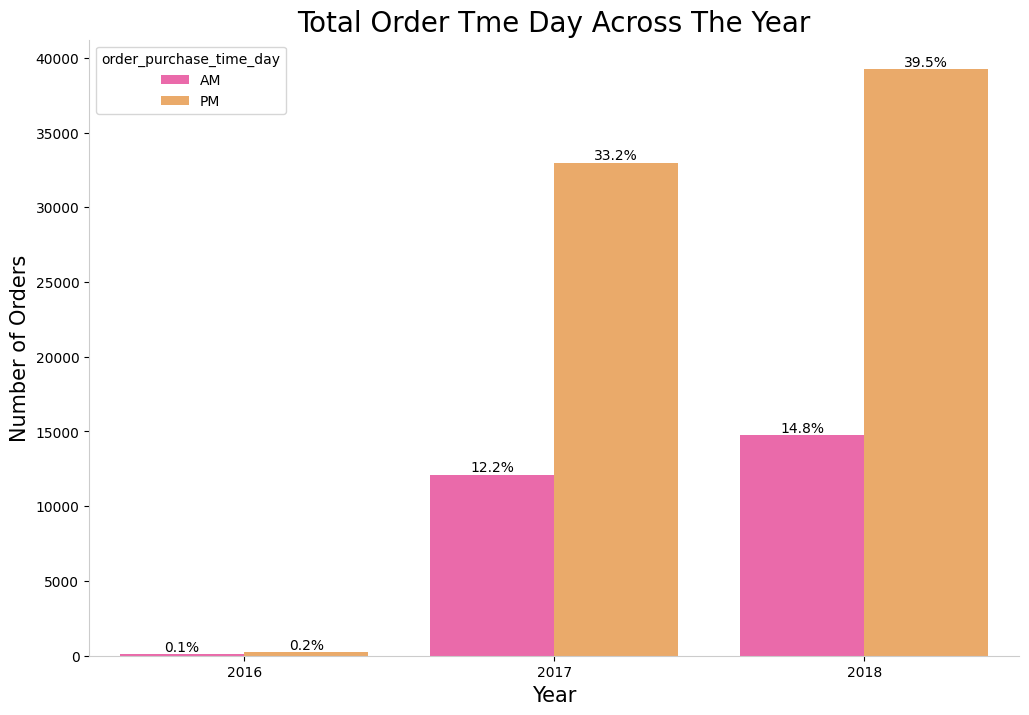

In [17]:
order = ['2016','2017','2018']
x = df_orders['order_purchase_year']
hue = df_orders['order_purchase_time_day']
count_plot(x,df_orders,'Total Order Tme Day Across The Year','Year','Number of Orders',12,8,order=order,hue=hue,palette='spring')

The analysis purchase order by order time day across the month & year :

1. The number of orders in the morning (AM) and afternoon/evening (PM) increases significantly from 2016 to 2018, indicating overall growth in sales during these time periods.
2. In 2017, there is a substantial increase in both AM and PM orders compared to the other years, suggesting a peak in purchasing activity during that year.
3. In 2018, the number of orders continues to rise, with the afternoon/evening (PM) showing a higher volume compared to the morning (AM).

These insights highlight the importance of considering the time of day when analyzing and optimizing business operations. By understanding the patterns and trends in order volumes across different years and time periods, businesses can strategically allocate resources and tailor their marketing efforts to cater to customer preferences and maximize sales potential.

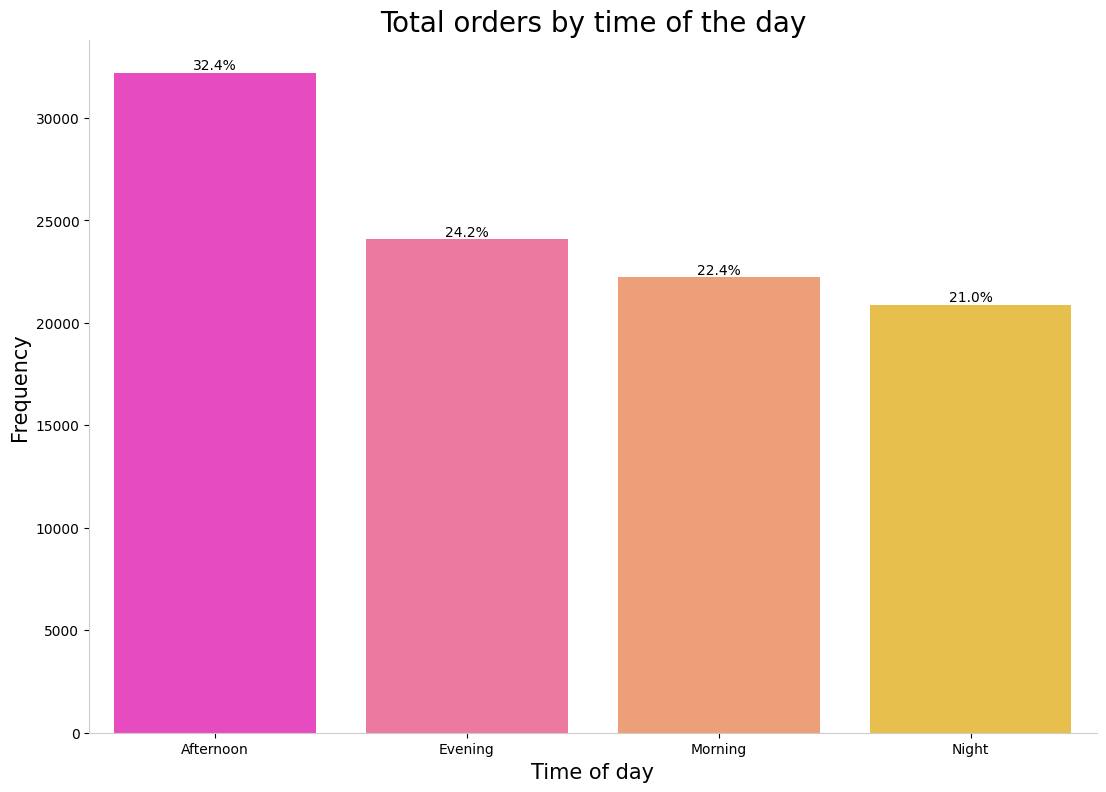

In [18]:
x = df_orders['classification_time_purchase']
order = x.value_counts().index
count_plot(x, df_orders,'Total orders by time of the day', 'Time of day' , 'Frequency', 13,9, order=order, palette='spring')

Analysis of Order Purchase by Time of Day :
Customers tend to make the most orders in the afternoon, followed by the evening, morning, and night. Afternoon has the highest count, indicating that many customers choose to shop during that time. Evening is also popular, likely due to convenience and leisure time. Morning orders are significant, possibly for convenience or early planning. Nighttime orders show that some customers prefer to shop during late hours. Understanding these time preferences can help businesses plan their operations, allocate resources effectively, and tailor marketing strategies for better customer engagement and sales.

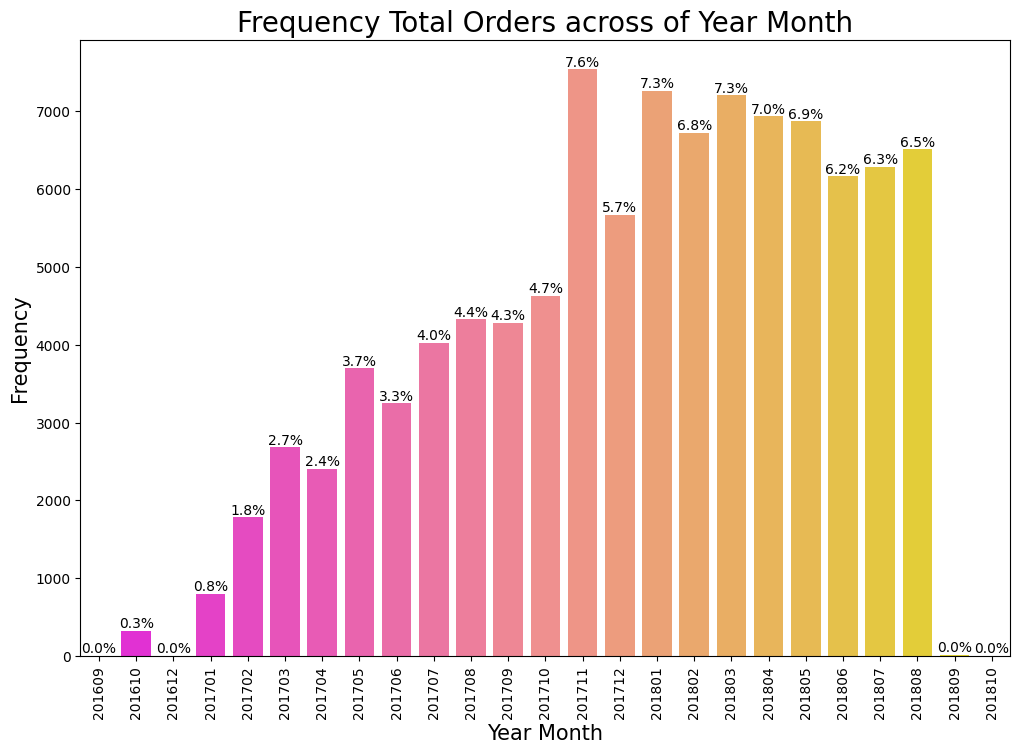

In [19]:
x = df_orders['order_purchase_year_month'].value_counts().index
y = df_orders['order_purchase_year_month'].value_counts().values
order = sorted(x)
bar_plot(x,y,df_orders,'Frequency Total Orders across of Year Month','Year Month','Frequency',12,8,palette='spring',rotation=True,order=order)

<a id="4.3"></a>
<font color="dimgrey" size=+2.0><b>4.3 Monthly Sales Trends and Price Distribution</b></font>

Objective: Visualize Monthly Total Sales and Price Ratio

Description: The objective is to analyze the monthly sales trends and price distribution in order to gain insights into the overall performance and pricing dynamics of the business. By visualizing the monthly total sales and calculating the price ratio, businesses can understand the variations in sales volumes across different months and assess the proportion of revenue generated by each month relative to the total sales. This analysis provides valuable information for identifying patterns, trends, and potential opportunities or challenges related to pricing strategies, seasonal variations, and customer purchasing behavior.

In [20]:
df_orders = pd.merge(df_orders,olist_order_items_dataset,how='left',on='order_id')
df_orders.head()

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_y,...,order_purchase_time_day,order_purchase_year_month,classification_time_purchase,index,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,70296,...,AM,201710,Morning,100785.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,77027,...,PM,201807,Evening,36896.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,554,...,AM,201808,Morning,31504.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,61081,...,PM,201711,Evening,65021.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,67263,...,PM,201802,Night,76043.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


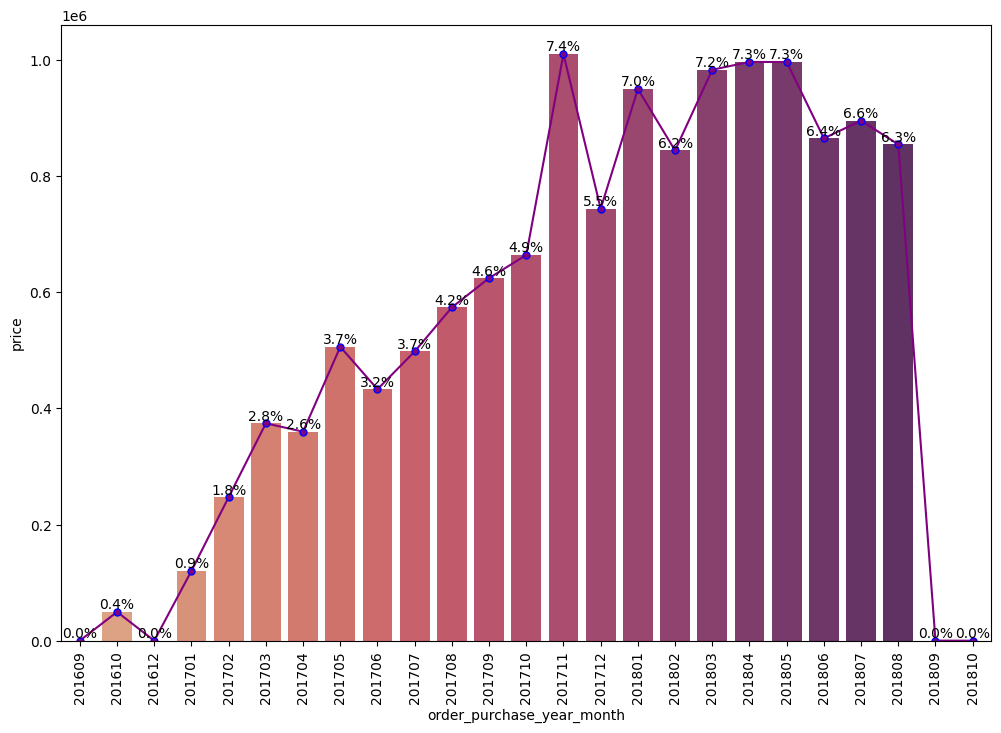

In [21]:
# Calculate the total price per year and month
price_yearmonth = df_orders.groupby(['order_purchase_year_month'])['price'].sum().reset_index()

# Calculate the price ratio relative to the total sum of prices
price_yearmonth['price_ratio'] = price_yearmonth['price'] / price_yearmonth['price'].sum()

# Set the x and y values for plotting
x = price_yearmonth['order_purchase_year_month']
y = price_yearmonth['price']

# Create the figure and plot
plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='.', color='purple', markersize=10, markeredgecolor='blue')

# Create the bar plot
ax = sns.barplot(x=x, y=y, palette='flare')
plt.xticks(rotation='vertical')

# Annotate the bar plot with the price ratios
for i, p in enumerate(ax.patches):
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(price_yearmonth['price_ratio'][i] * 100), (x.mean(), y),
                ha='center', va='bottom')

# Show the plot
plt.show()


The data obtained by visualizing the monthly total sales and calculating the price ratio provides valuable insights into the business's performance and pricing dynamics. The surge in sales observed in November 2017 highlights a peak month for purchases, while the price ratios offer an understanding of each month's contribution to the overall sales. The data also reveals variations in sales volumes across different months, with some months exhibiting lower sales volumes and others having missing or incomplete data. By analyzing these patterns and trends, businesses can make informed decisions regarding pricing strategies, identify seasonal variations, and tailor their approach to customer purchasing behavior. This analysis aids in optimizing operations and uncovering potential opportunities or challenges for the business.

<a id="4.4"></a>
<font color="dimgrey" size=+2.0><b>4.4 Order Frequency by Customer State</b></font>

Objective: Explore the distribution of order frequency among different customer states.

By analyzing the frequency of orders across various customer states, we can gain insights into the geographical distribution of customer activity and identify regions with high or low order frequencies.

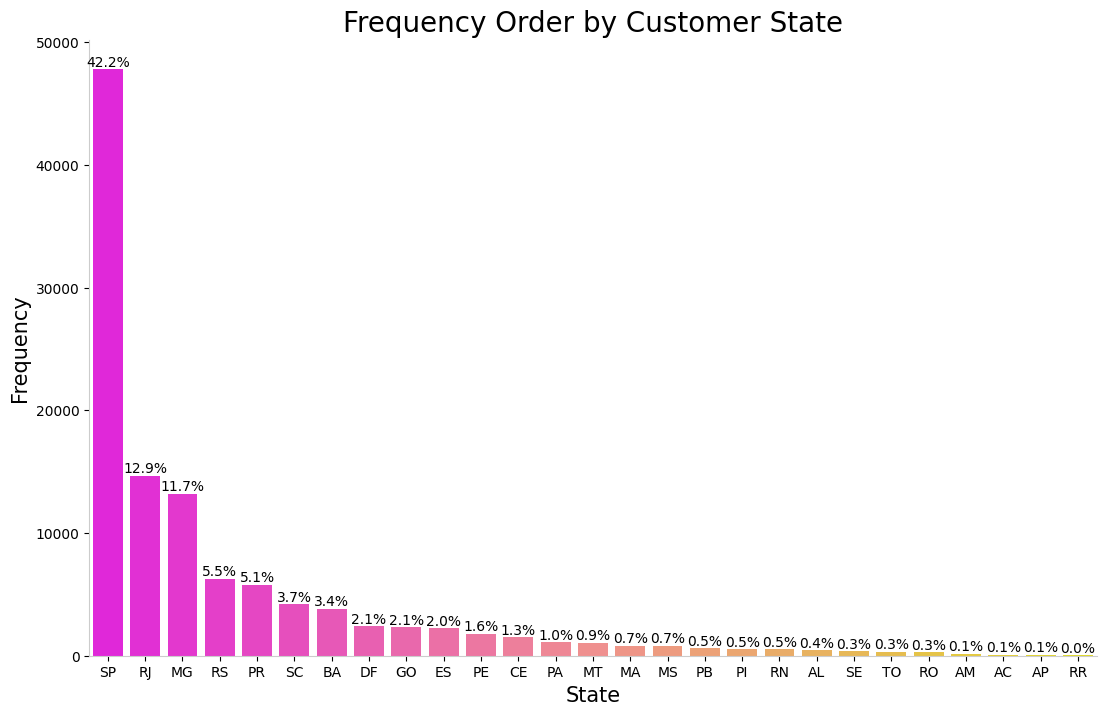

In [22]:
x = df_orders['customer_state']
order = x.value_counts().index
count_plot(x,df_orders,'Frequency Order by Customer State','State','Frequency',13,8,order=order,palette='spring')

The data reveals the distribution of order frequency among different customer states. Among the states, São Paulo (SP) has the highest order frequency with 67,640 orders, followed by Rio de Janeiro (RJ) with 20,061 orders and Minas Gerais (MG) with 18,022 orders. This indicates a higher level of customer activity and demand in these regions. Conversely, states like Roraima (RR), Amapá (AP), and Acre (AC) have relatively lower order frequencies, with 64, 124, and 138 orders respectively.

This analysis helps us understand the geographical distribution of customer activity and identify regions where there is a higher concentration of orders. By recognizing states with high or low order frequencies, businesses can tailor their marketing strategies, optimize logistics, and focus on customer acquisition and retention efforts in specific regions accordingly.

<a id="4.5"></a>
<font color="dimgrey" size=+2.0><b>4.5 Top 20 Cities with the Most Orders</b></font>


Objective: Identify the cities with the highest order frequencies and understand their significance in overall customer activity.

By analyzing the top 20 cities with the highest order frequencies, we can gain insights into the geographic concentration of customer orders and identify key locations that contribute significantly to overall customer activity.

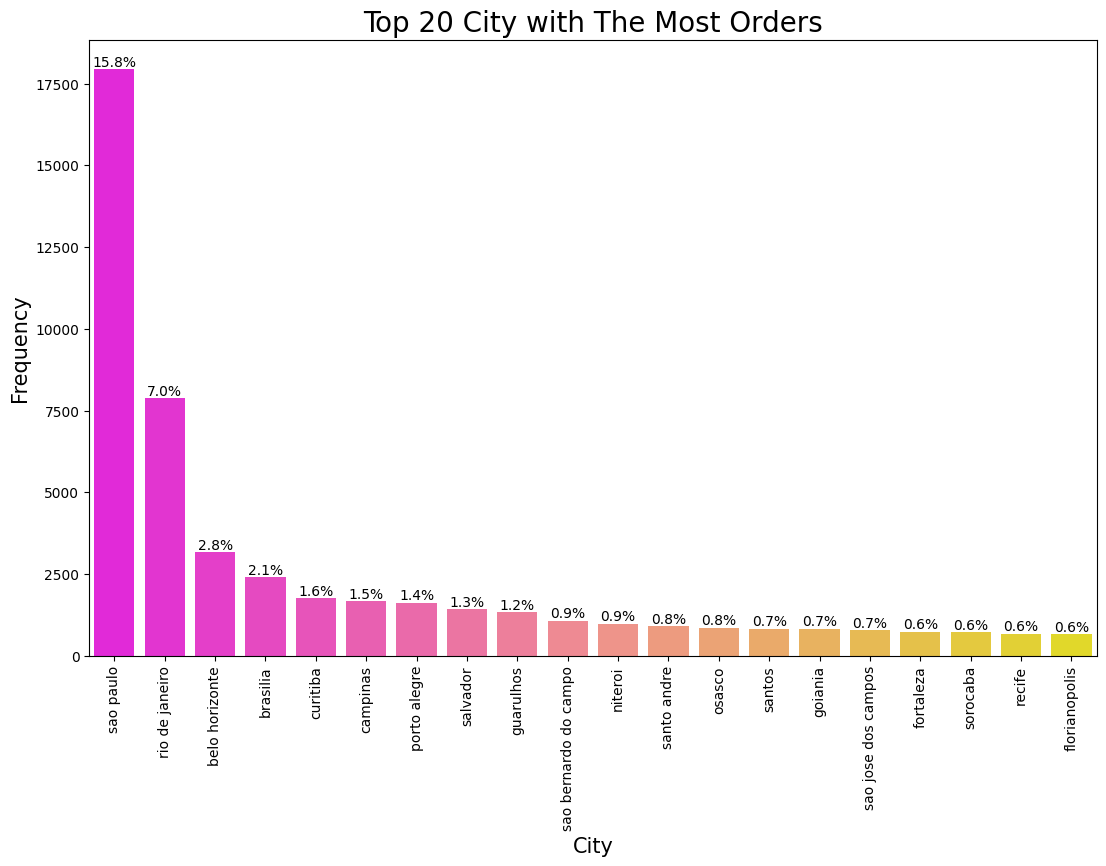

In [23]:
top20city = df_orders['customer_city'].value_counts().head(20)
x = top20city.index
y = top20city.values
bar_plot(x,y,df_orders,'Top 20 City with The Most Orders','City','Frequency',13,8,palette='spring',rotation=True)

The data provides insights into the top 20 cities with the highest order frequencies. São Paulo stands out as the city with the most orders, with 26,144 orders, followed by Rio de Janeiro with 11,021 orders and Belo Horizonte with 4,339 orders. These cities demonstrate a high level of customer activity and contribute significantly to the overall customer order volume. Other cities such as Brasília, Curitiba, and Porto Alegre also exhibit notable order frequencies.

By analyzing the geographic concentration of customer orders, businesses can identify key locations that play a crucial role in driving customer activity. This information allows businesses to focus their marketing efforts, logistics planning, and customer engagement strategies in these cities to maximize their impact and optimize overall customer activity.

<a id="4.6"></a>
<font color="dimgrey" size=+2.0><b>4.6 Summary Analyzing E-Commerce Order Trends and Patterns</b></font>


C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_4596\923879212.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


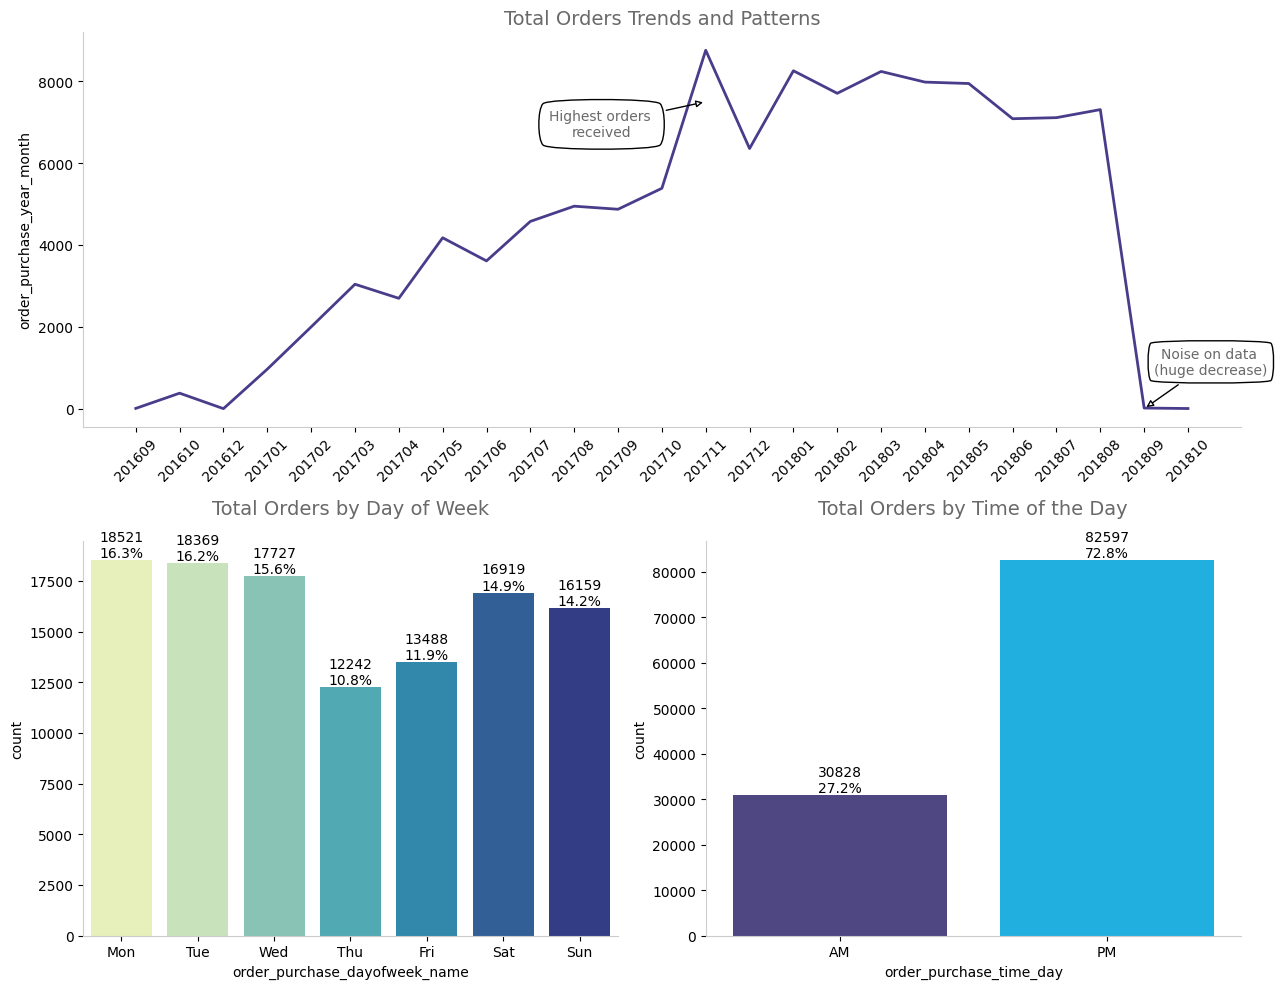

In [26]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Total Orders Trends and Patterns', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(df_orders, x='order_purchase_dayofweek_name', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(df_orders, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

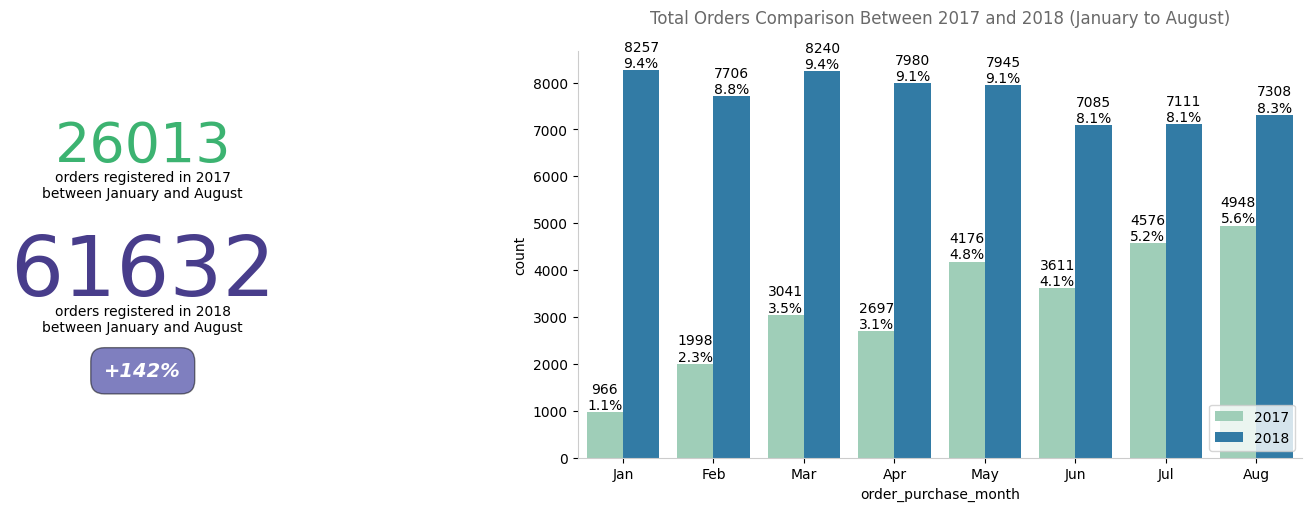

In [27]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
df_orders_compare = df_orders.copy()
df_orders_compare[['order_purchase_year', 'order_purchase_month']] = df_orders_compare[['order_purchase_year', 'order_purchase_month']].astype(int)
df_orders_compare = df_orders_compare[df_orders_compare['order_purchase_year'].isin([2017, 2018])]
df_orders_compare = df_orders_compare[df_orders_compare['order_purchase_month']<=8]
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
single_countplot(df_orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

Result :
Based on the chart, we can conclude that dataset shows a clear upward trend over time, with seasonal peaks in certain months. Customers in Brazil demonstrate a preference for making online purchases on Mondays, particularly during the afternoon. However, it is worth noting a significant decrease in orders between August 2018 and September 2018, which may be attributed to data noise. To ensure accurate year-to-year comparisons, it is advisable to analyze orders between January and August in both 2017 and 2018. Overall, these insights highlight the growth and patterns in online shopping for e-commerce